# 빅데이터 분석기사 도움말 활용팁

In [1]:
import scipy
",".join(dir(scipy.stats))

'BootstrapMethod,CensoredData,ConstantInputWarning,Covariance,DegenerateDataWarning,FitError,MonteCarloMethod,NearConstantInputWarning,PermutationMethod,__all__,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__path__,__spec__,_ansari_swilk_statistics,_axis_nan_policy,_biasedurn,_binned_statistic,_binomtest,_bws_test,_censored_data,_common,_constants,_continuous_distns,_covariance,_crosstab,_discrete_distns,_distn_infrastructure,_distr_params,_entropy,_fit,_hypotests,_kde,_ksstats,_levy_stable,_mannwhitneyu,_mgc,_morestats,_mstats_basic,_mstats_extras,_multicomp,_multivariate,_mvn,_odds_ratio,_page_trend_test,_qmc,_qmc_cy,_qmvnt,_rcont,_relative_risk,_resampling,_rvs_sampling,_sampling,_sensitivity_analysis,_sobol,_stats,_stats_mstats_common,_stats_py,_stats_pythran,_survival,_tukeylambda_stats,_unuran,_variation,_warnings_errors,_wilcoxon,alexandergovern,alpha,anderson,anderson_ksamp,anglit,ansari,arcsine,argus,barnard_exact,bartlett,bayes_mvs,bernoulli,beta,b

- 설명서

In [2]:
help(scipy.stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

# 6회 기출문제 응용

## Section 1 응용
- tips 데이터셋 활용한 적합성 검정
- 정해진 비율의 차이가 실제로 존재하는지 확인하는 코드

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### 문제1
- 문제 : Smoker가 'Yes'으로 분류된 남성과 여성의 비율을 소수점 이하 둘째 자리까지 출력하시오.

In [4]:
import pandas as pd
tips.groupby('sex')['smoker'].value_counts().unstack()

C:\Users\user\AppData\Local\Temp\ipykernel_10940\1249548499.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['smoker'].value_counts().unstack()


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
tips.groupby('sex')['smoker'].value_counts(normalize=True).unstack()

smoker,Yes,No
sex,,
Male,0.382166,0.617834
Female,0.379310,0.620690


In [5]:
import numpy as np
result = tips.groupby('sex')['smoker'].value_counts(normalize=True).unstack()

print(np.round(result.loc["Male", "Yes"], 3), np.round(result.loc["Female", "Yes"], 3))

0.382 0.379


C:\Users\user\AppData\Local\Temp\ipykernel_10940\2822235581.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = tips.groupby('sex')['smoker'].value_counts(normalize=True).unstack()


### 문제2
- 팁을 준 고객들 중 남성과 여성의 비율이 50:50인지를 검정하는 간단한 적합도 검정을 수행

In [6]:
import scipy
",".join(dir(scipy.stats))

'BootstrapMethod,CensoredData,ConstantInputWarning,Covariance,DegenerateDataWarning,FitError,MonteCarloMethod,NearConstantInputWarning,PermutationMethod,__all__,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__path__,__spec__,_ansari_swilk_statistics,_axis_nan_policy,_biasedurn,_binned_statistic,_binomtest,_bws_test,_censored_data,_common,_constants,_continuous_distns,_covariance,_crosstab,_discrete_distns,_distn_infrastructure,_distr_params,_entropy,_fit,_hypotests,_kde,_ksstats,_levy_stable,_mannwhitneyu,_mgc,_morestats,_mstats_basic,_mstats_extras,_multicomp,_multivariate,_mvn,_odds_ratio,_page_trend_test,_qmc,_qmc_cy,_qmvnt,_rcont,_relative_risk,_resampling,_rvs_sampling,_sampling,_sensitivity_analysis,_sobol,_stats,_stats_mstats_common,_stats_py,_stats_pythran,_survival,_tukeylambda_stats,_unuran,_variation,_warnings_errors,_wilcoxon,alexandergovern,alpha,anderson,anderson_ksamp,anglit,ansari,arcsine,argus,barnard_exact,bartlett,bayes_mvs,bernoulli,beta,b

In [ ]:
help(scipy.stats.chisquare)

Help on function chisquare in module scipy.stats._stats_py:

chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    Calculate a one-way chi-square test.
    
    The chi-square test tests the null hypothesis that the categorical data
    has the given frequencies.
    
    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
        is the number of observed frequencies.  The default value of `ddof`
        is 0.
    axis : int or None, optional
        The axis of the broadcast result of `f_obs` and `f_exp` along which to
        apply the test.  If axis is None, al

In [7]:
# np.array([7, 2, 10, 10, 10]).sum()
np.array([7, 3, 20, 10, 10]).sum()

50

- 기대값과 관측값의 전체 합이 같을 때 / 다를 때 코드 작성 방법

In [8]:
from scipy.stats import chisquare
import numpy as np

# 기대값
expected_values = np.array([7, 2, 10, 10, 10]) / 39 * 50

# 관측값
obs_values = np.array([7, 3, 20, 10, 10])

chi2_stat, pvalue = chisquare(obs_values, f_exp = expected_values)
print(chi2_stat, pvalue)

5.770000000000001 0.21699585734924265


- 팁을 준 고객들 중 남성과 여성의 비율이 50:50인지를 검정하는 간단한 적합도 검정을 수행

In [9]:
# 기대값 vs 관측값
observed_frequencies = tips['sex'].value_counts().values
observed_frequencies

array([157,  87], dtype=int64)

In [10]:
# 기대되는 빈도 계산 (50:50 비율 가정)
total_count = observed_frequencies.sum()
expected_frequencies = [total_count / 2, total_count / 2]

In [11]:
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
print(chi2_stat, pvalue)

20.081967213114755 0.21699585734924265


### 문제3
- 위의 통계량에 대한 유의확률(p-value)을 출력(반올림하여 소수점 이하 넷째 자리까지 계산)하고, 유의수준 5% 하에서 가설 검정의 결과를 (귀무가설 채택 / 기각) 중 하나를 선택하시오.
- 가설검정
  + 귀무가설 : 남성과 여성 고객의 비율이 50:50이다.
  + 대립가설 : 남성과 여성 고객의 비율이 50:50이 아니다.

In [12]:
alpha = 0.05 # 유의수준 5%
if pvalue > alpha:
  print("귀무가설 채택")
else:
  print("귀무가설 기각 & 대립가설 채택")

귀무가설 채택


## Section 2 응용
- diamonds 데이터셋 활용
- 결측치(NA)를 포함하는 모든 행을 제거한 후, (carat, depth, table) 항목을 이용하여 price를 예측하는 다중 선형회귀 모형을 구축하고 다음 수행 결과를 출력한다.

In [13]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [14]:
df = diamonds.dropna()
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [15]:
df.shape, diamonds.shape

((53940, 10), (53940, 10))

### 문제1
- carat 항목에 대한 회귀계수를 구하시오. 단, 출력문은 print()를 이용하고 소수점 이하 넷째 자리에서 반올림하여 소수점 이하 셋째 자리까지 출력하시오.

In [16]:
# 코드
from statsmodels.formula.api import ols

X = df.loc[:, ['carat', 'depth', 'table']]
y = df['price']

model = ols('y ~ X', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.795e+05
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:42:38   Log-Likelihood:                -19068.
No. Observations:               53940   AIC:                         3.814e+04
Df Residuals:                   53936   BIC:                         3.818e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9714      0.088     78.979      0.0

In [17]:
formula = "price ~ carat + depth + table"
model = ols(formula, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:42:38   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+04    390.918     33.264      0.0

In [18]:
# Carat의 회귀계수
model.params

Intercept    13003.440524
carat         7858.770510
depth         -151.236347
table         -104.472780
dtype: float64

In [19]:
import pandas as pd
import numpy as np

result = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(np.round(result.loc['carat', 'coef'], 3))

7858.77


C:\Users\user\AppData\Local\Temp\ipykernel_10940\1439253639.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  result = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]


### 문제2
- table 항목에 대한 t-통계량을 소수점 이하 셋째 자리까지 출력하시오.


In [20]:
# 코드
np.round(result.loc['table', 't'], 3)

-33.259

### 문제3
- 다음 예측변수 값에 대한 Price를 예측하고, carat 항목의 계수값에 대한 95% 신뢰구간을 출력하시오.
  + carat = 0.35,
  + depth = 57.5
  + table = 53.1

In [21]:
# 코드
import pandas as pd
sample_df = pd.DataFrame(
    [[0.35, 57.5, 53.1]], columns = ['carat', 'depth', 'table']
)

print('예측값: ', model.predict(sample_df).values[0])

예측값:  1510.4156303344544


In [22]:
# 신뢰구간
conf_df = model.conf_int()
conf_df.loc["carat", 0], conf_df.loc["carat", 1]

(7831.034681449392, 7886.506338422804)

# 7회 기출문제 응용

## Section1 응용
- boston 데이터 중에서 상관관계가 가장 작은 값을 구하시오.

In [23]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024/한경-토스뱅크/통계실습문제/'
df = pd.read_csv(DATA_PATH + "boston.csv", encoding="euc-kr", index_col=0)
df.head()

In [24]:
df.corr()

ValueError: could not convert string to float: 'Ideal'

In [ ]:
# 대각선을 제외하고 상삼각 행렬만 남기기 (np.triu: 상삼각 행렬, k=1로 설정하여 대각선 바로 위부터 포함)
# 코드
import numpy as np

corr_mat = df.corr()
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

# 상삼각 행렬에서 가장 큰 상관계수 찾기
max_corr_value = upper_tri.stack().max()
max_corr_pairs = upper_tri.stack().idxmax()

# 코드
max_corr_value, max_corr_pairs

(0.9102281885331865, ('rad', 'tax'))

## Section2 응용
- tips 데이터를 이용하여 total_bill과 tip 사이의 관계를 분석한다.

### 문제 1
- total bill을 이용하여 tip을 예측하는 모형을 구축하시오.

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df = df.dropna()
tips.shape, df.shape

((244, 7), (244, 7))

In [ ]:
import statsmodels.api as sm

X = df['total_bill']
y = df['tip']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.69e-34
Time:                        08:18:49   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### 문제2
- 구축된 모형에 대한 결정계수의 값을 출력하시오.

In [ ]:
# 코드
import numpy as np

np.round(model.rsquared, 3)

0.457

### 문제3
- tip에 대한 키의 오즈비(Odds Ratio, total bill의 변화가 몸무게 로그 오즈에 미치는 영향을 출력하시오)

In [ ]:
# 코드
model.params

const         0.920270
total_bill    0.105025
dtype: float64

In [ ]:
# 코드
import numpy as np
odds = np.exp(model.params['total_bill'])
np.round(odds, 3)

1.111

In [ ]:
help(np.exp)

Help on ufunc:

exp = <ufunc 'exp'>
    exp(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Calculate the exponential of all elements in the input array.
    
    Parameters
    ----------
    x : array_like
        Input values.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, the `out` array will retain its original value.
        Note that if an uninitialized `out` array is created via the default
        ``

## Section3 응용


### 문제1
- 독립변수 total_bill, tip으로 sex를 이용하여 성별(Male=0, Female=1)을 분류하는 모형을 구축하시오.
- statsmodels.api에 포함되어 있는 Logit 함수를 이용하시오.

In [ ]:
# 코드
import seaborn as sns
tips = sns.load_dataset('tips')

df = tips.copy()
df = df.dropna() # 결측치가 있는 행 제거
tips.shape, df.shape

((244, 7), (244, 7))

In [ ]:
# 코드
import statsmodels.api as sm

df['성별_변환'] = df['sex'].replace({'Male':0, 'Female':1})
X = df.loc[:, ['total_bill', 'tip']]
y = df['성별_변환']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.640454
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  성별_변환   No. Observations:                  244
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                 0.01682
Time:                        08:20:21   Log-Likelihood:                -156.27
converged:                       True   LL-Null:                       -158.94
Covariance Type:            nonrobust   LLR p-value:                   0.02075
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill    -0.0375      0.020     -1.852      0.064      -0.077       0.002
tip            0.0414      0.

### 문제2
- 키, 몸무게에 대한 유의확률을 출력하고 최대 유의확률 값을 출력하시오.

In [ ]:
# 코드
model.pvalues

total_bill    0.064089
tip           0.751186
dtype: float64

In [ ]:
# 코드
import numpy as np
max_pvalue = np.max(model.pvalues)
max_pvalue

0.7511855802404372

### 문제3
- 훈련:평가=70:30로 구분하여 평가 데이터에 대한 혼동행렬 ROC, AUC를 출력한다.

In [ ]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


(244, 7) (244, 8)
(244, 2) (244,)
Optimization terminated successfully.
         Current function value: 0.671224
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  성별_변환   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:               -0.004898
Time:                        05:19:53   Log-Likelihood:                -114.11
converged:                       True   LL-Null:                       -113.55
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill    -0.0275      0.022     -1.256      0.209      -0.070       0

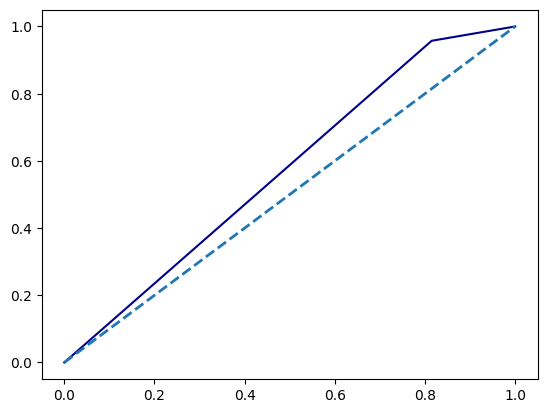

In [ ]:
# 머신러닝 문제
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(12)

tips = sns.load_dataset("tips")
df = tips.copy()
df = df.dropna()
df.loc[:, '성별_변환'] = df['smoker'].replace({'Yes':0, 'No':1})
print(tips.shape, df.shape)

X = df.loc[:, ['total_bill', 'tip']]
y = df['성별_변환']

print(X.shape, y.shape)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12
)

# 모델 생성
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

# 모델 예측값 생성
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

confusion_matrix(y_test, y_pred)
# roc_auc_score(y_test, y_pred) AUC 점수를 바로 구하는 코드

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr) # AUC 점수를 ROC_CURVE 메서드 활용

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color = 'darkblue')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.show()